In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets
from pandas import Series, DataFrame
from sklearn import tree


# Import and Preview

In [2]:
fraud = pd.read_csv('fraud_data.csv')
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Haleys weird

In [3]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Explore

Check for missing values in data set

In [4]:
print("Number of NaN values: ",fraud.isna().any().sum())
print("Number of null values: ",fraud.isnull().any().sum())

Number of NaN values:  0
Number of null values:  0


No null and no NaN values in set

In [5]:
print(f"Toal transactions: {len(fraud)}")

Toal transactions: 6362620


Check basic summary stats

In [6]:
pd.set_option('display.max_rows', None)
correct_flag = fraud.loc[(fraud['isFraud']==1) & (fraud['isFlaggedFraud']==1)]
print(correct_flag.sum())
print(correct_flag)

step                                                           8601
type              TRANSFERTRANSFERTRANSFERTRANSFERTRANSFERTRANSF...
amount                                                  7.77856e+07
nameOrig          C728984460C1100582606C1035541766C908544136C689...
oldbalanceOrg                                           1.25086e+08
newbalanceOrig                                          1.25086e+08
nameDest          C639921569C1147517658C1100697970C891140444C139...
oldbalanceDest                                                    0
newbalanceDest                                                    0
isFraud                                                          16
isFlaggedFraud                                                   16
dtype: object
         step      type       amount     nameOrig  oldbalanceOrg  \
2736446   212  TRANSFER   4953893.08   C728984460     4953893.08   
3247297   250  TRANSFER   1343002.08  C1100582606     1343002.08   
3760288   279  TRANSFER    536624.

# Visualize

In [7]:
## Imports
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
# print(f"Number of transactions analyzed: {fraud[]})
print(f"Number of actual fraud cases: {fraud['isFraud'].sum()}")
print(f"Number of transactions flagged as fraud: {fraud['isFlaggedFraud'].sum()}")
print(f"only {round((fraud['isFlaggedFraud'].sum())/(fraud['isFraud'].sum()),3)*100}% of trasactions are being caught")

Number of actual fraud cases: 8213
Number of transactions flagged as fraud: 16
only 0.2% of trasactions are being caught


In [9]:
fraud_amt = fraud.loc[(fraud['isFraud'] == 1) & 
                         (fraud['amount'])]
frauds = fraud.loc[(fraud['isFraud'] == 1)]
legit = fraud.loc[(fraud['isFraud']== 0)]
fraud_percent = len(frauds)/len(fraud)

In [10]:
fraud_percent

0.001290820448180152

## Distribution of fraud amounts

In [11]:
total_lost = round(fraud_amt['amount'].sum(),2)
total_cases = frauds['isFraud'].sum()
total_legit = fraud.step.count()-total_cases
print(f"Toal amount lost to fraud: ${total_lost}")
print(f"Total cases: {total_cases}")
print(f"total legit trans: {total_legit}")

Toal amount lost to fraud: $12056415427.84
Total cases: 8213
total legit trans: 6354407


(array([3924., 1172.,  688.,  436.,  297.,  260.,  177.,  129.,  116.,
          88.,   66.,   72.,   60.,   48.,   45.,   50.,   42.,   34.,
          51.,   30.,   28.,   24.,   30.,   23.,  307.]),
 array([6.38000000e+01, 4.00061248e+05, 8.00058696e+05, 1.20005614e+06,
        1.60005359e+06, 2.00005104e+06, 2.40004849e+06, 2.80004594e+06,
        3.20004338e+06, 3.60004083e+06, 4.00003828e+06, 4.40003573e+06,
        4.80003318e+06, 5.20003062e+06, 5.60002807e+06, 6.00002552e+06,
        6.40002297e+06, 6.80002042e+06, 7.20001786e+06, 7.60001531e+06,
        8.00001276e+06, 8.40001021e+06, 8.80000766e+06, 9.20000510e+06,
        9.60000255e+06, 1.00000000e+07]),
 <a list of 25 Patch objects>)

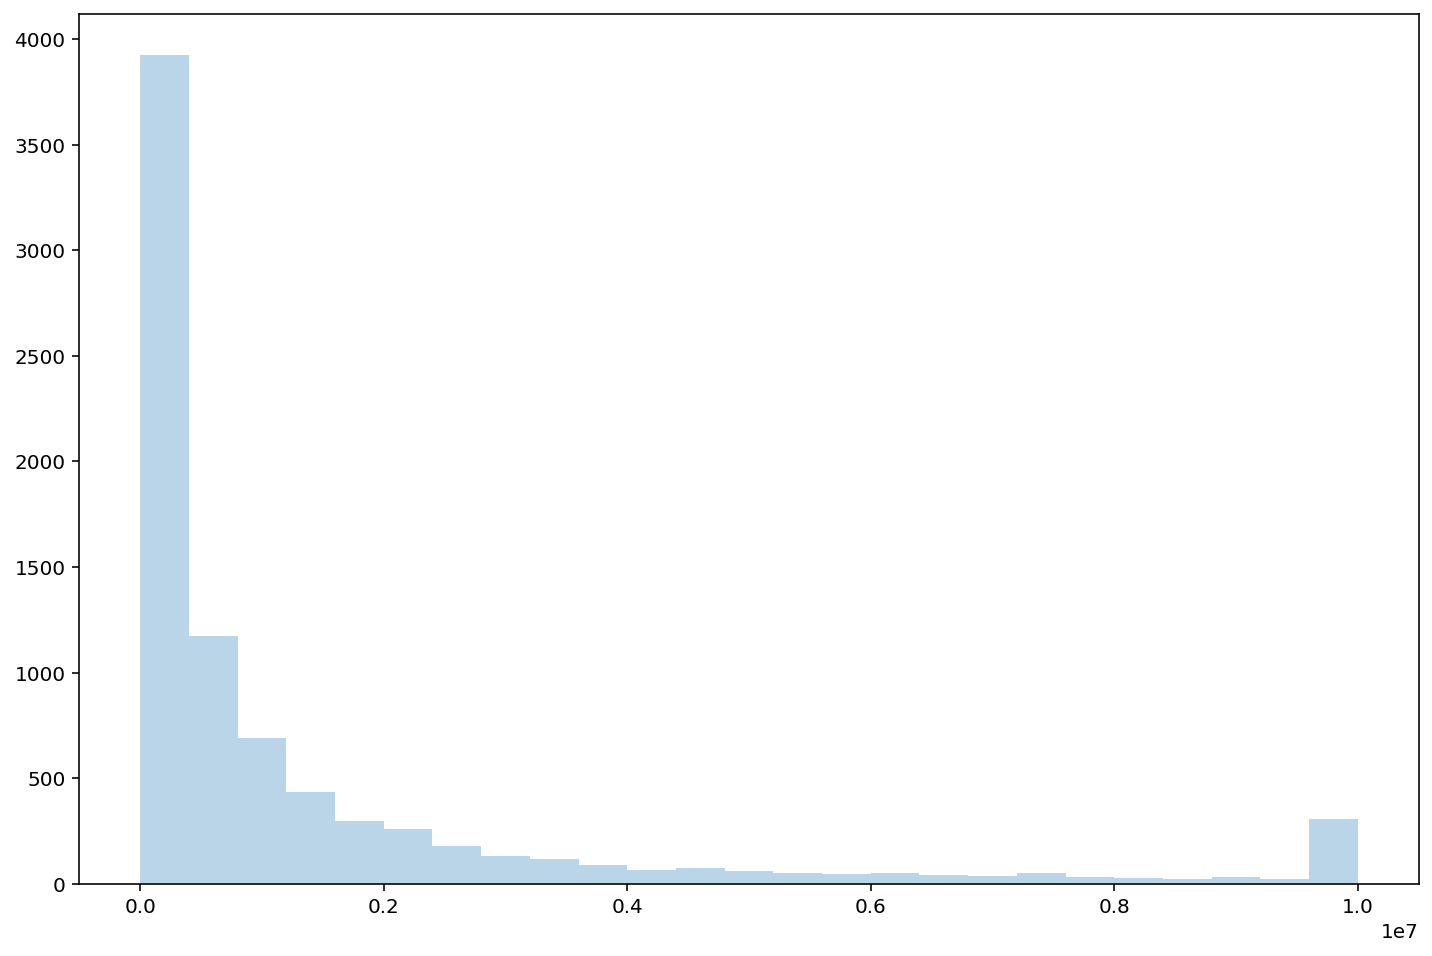

In [12]:
fig=plt.figure(figsize=(12,8))
plt.hist(fraud_amt['amount'],bins=25, alpha=0.3)

The majority of fraud is occuring in the amounts between 0 and 2 million.  Need to examine that range.  However, the spike at the far right end indicates that while still small in frequency by comparison, The amount of money lost in that bin is significant.

#### Greater than 8mil

Total money lost in this range: 3988961407.97
Proportion to total cases: 5.02%
proportion to total($): 33.09%


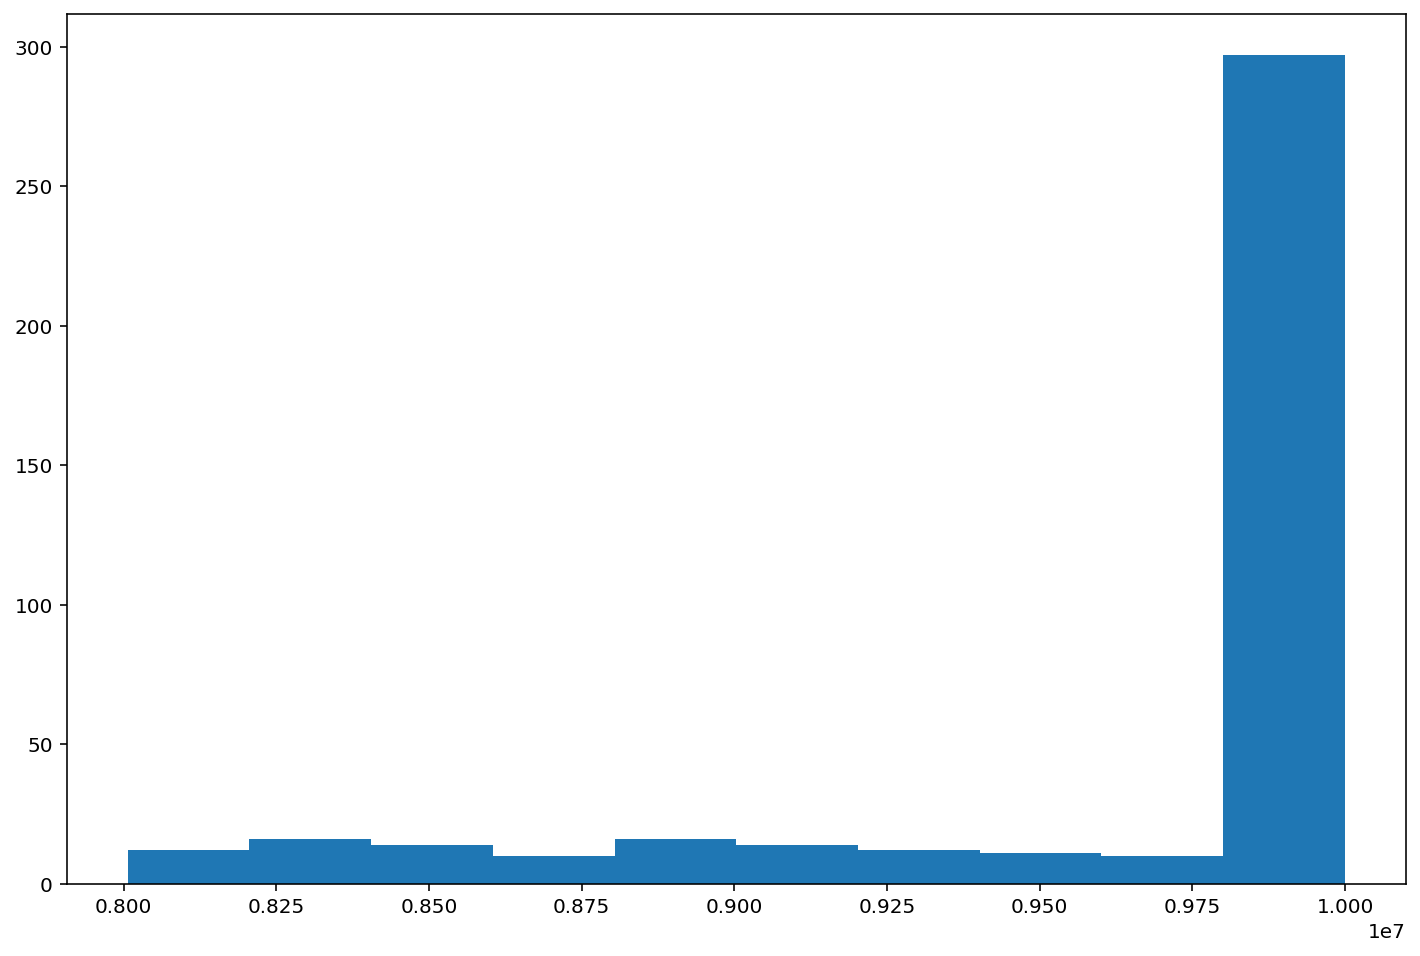

In [13]:
fig=plt.figure(figsize=(12,8))
majority_amt7 = fraud_amt.loc[(fraud_amt['amount'] > 8000000)] 
plt.hist(majority_amt7['amount'])
money_lost = majority_amt7['amount'].sum()
cases1 = majority_amt7['isFraud'].sum()*100
proportion_cases = round((cases1/total_cases),2)
proportion = round((money_lost/total_lost*100),2) 
print(f"Total money lost in this range: {money_lost}")
print(f"Proportion to total cases: {proportion_cases}%")
print(f"proportion to total($): {proportion}%")

## Confusion Matrix

In [24]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn

[[     16    8197]
 [      0 6354407]]
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      8213
           0       1.00      1.00      1.00   6354407

    accuracy                           1.00   6362620
   macro avg       1.00      0.50      0.50   6362620
weighted avg       1.00      1.00      1.00   6362620



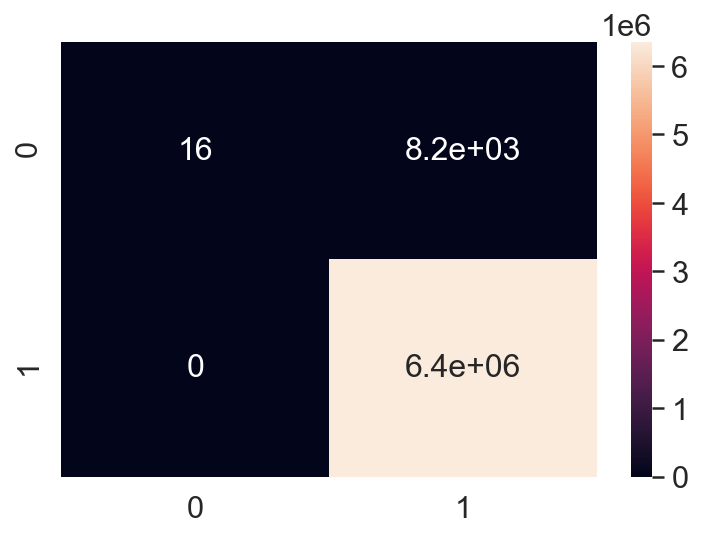

In [25]:
# Predicted values
y_pred = fraud.isFlaggedFraud
# Actual values
y_act = fraud.isFraud
# plt.show()
print(metrics.confusion_matrix(y_act, y_pred, labels=[1, 0]))
print(metrics.classification_report(y_act, y_pred, labels=[1, 0]))
# metrics.confusion_matrix(y_act, y_pred, labels=[1, 0])
# metrics.classification_report(y_act, y_pred, labels=[1, 0])
g_conf = metrics.confusion_matrix(y_act, y_pred, labels=[1, 0])
df_g_conf = pd.DataFrame(g_conf, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_g_conf, annot=True, annot_kws={"size": 16})

plt.show()

## Logistic Regression

In [26]:
from scipy.stats import norm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

In [27]:
fraud = fraud.assign(time = fraud['step']%24)

In [28]:
X = fraud[['time', 'amount']]
y = fraud['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


model=LogisticRegression()
model.fit(X_train, y_train)

# check the accuracy on the training set
print("accuracy on the training set:",model.score(X_train, y_train))

# check the accuracy on the test dataset
print("accuracy on the testing set:",model.score(X_test, y_test))

# traina = train[train['isFraud']=='1']
# trainb = train[train['isFraud']=='0']
# plt.plot(traina['x'], traina['y'],'bs', label='is fraud')
# plt.plot(trainb['x'], trainb['y'],'r^', label='not fraud')
# plt.legend()
# plt.title('Training Data')
# plt.show()

accuracy on the training set: 0.9973154771748705
accuracy on the testing set: 0.9973314790692801


Confusion Matrix on train data
[[4251349    5404]
 [   6040     162]]
              precision    recall  f1-score   support

           1       0.03      0.03      0.03      6202
           0       1.00      1.00      1.00   4256753

    accuracy                           1.00   4262955
   macro avg       0.51      0.51      0.51   4262955
weighted avg       1.00      1.00      1.00   4262955



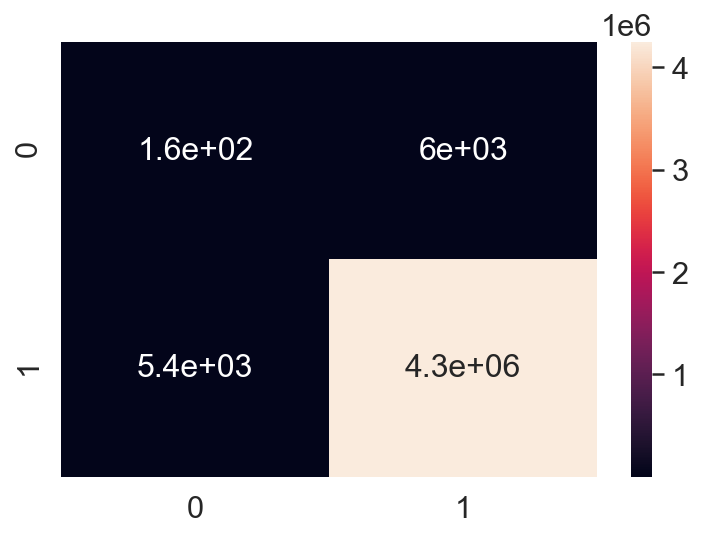

Confusion Matrix on test data
[[2093988    2573]
 [   3030      74]]
              precision    recall  f1-score   support

           1       0.03      0.03      0.03      6202
           0       1.00      1.00      1.00   4256753

    accuracy                           1.00   4262955
   macro avg       0.51      0.51      0.51   4262955
weighted avg       1.00      1.00      1.00   4262955



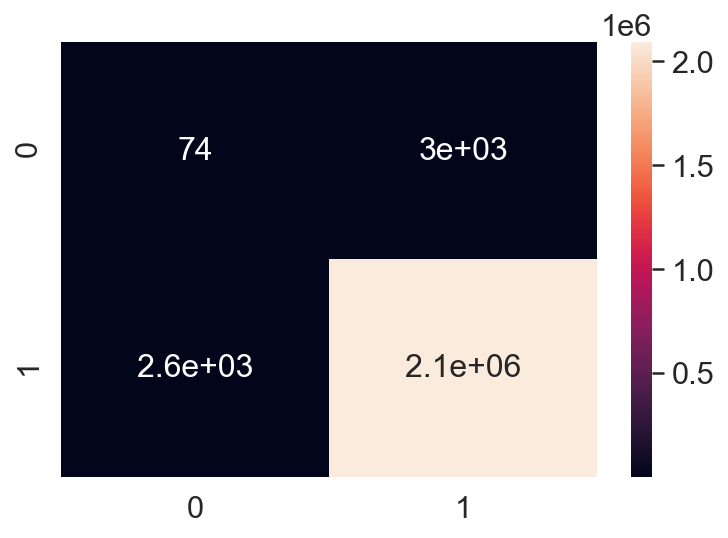

In [29]:
# Predicted values
y_pred = fraud.isFlaggedFraud
# Actual values
y_act = fraud.isFraud


# Predict class labels for the train set
predicted = model.predict(X_train)
# Confusion Matrix for train data
print('Confusion Matrix on train data')
print(metrics.confusion_matrix(predicted, y_train))
print(metrics.classification_report(predicted, y_train, labels=[1, 0]))
g_conf = metrics.confusion_matrix(predicted, y_train, labels=[1, 0])
df_g_conf = pd.DataFrame(g_conf, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_g_conf, annot=True, annot_kws={"size": 16})
plt.show()

# Predict class labels for the test dataset
predicted_test = model.predict(X_test)
# Confusion Matrix for test data
print('Confusion Matrix on test data')
print(metrics.confusion_matrix(predicted_test, y_test))
print(metrics.classification_report(predicted, y_train, labels=[1, 0]))
g_conf = metrics.confusion_matrix(predicted_test, y_test, labels=[1, 0])
df_g_conf = pd.DataFrame(g_conf, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_g_conf, annot=True, annot_kws={"size": 16})
plt.show()

# Juan's Models

## Final Data Preprocessing
Get dummy variables for feature "type".

In [128]:
import math

In [30]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,time
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


In [31]:
fraud.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [41]:
fraud['PAYMENT'] = pd.get_dummies(fraud["type"])["PAYMENT"]
fraud['TRANSFER'] = pd.get_dummies(fraud["type"])["TRANSFER"]
fraud['CASH_OUT'] = pd.get_dummies(fraud["type"])["CASH_OUT"]
fraud['DEBIT'] = pd.get_dummies(fraud["type"])["DEBIT"]
fraud['CASH_IN'] = pd.get_dummies(fraud["type"])["CASH_IN"]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,time,PAYMENT,TRANSFER,CASH_OUT,DEBIT,CASH_IN
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,1,0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,1,0,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0,1,0,0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,1,0,0,0,0


In [ ]:
fraud.head()

## Reassign frauds and legit dataframes.

In [72]:
frauds = fraud.loc[(fraud['isFraud'] == 1)].copy()
legit = fraud.loc[(fraud['isFraud']== 0)].copy()

In [73]:
len(frauds)

8213

In [74]:
len(legit)

6354407

## Balancing Data (Undersampling)

In [76]:
legitHold, legitUse = train_test_split(legit, test_size=3*len(frauds), random_state=0)

In [80]:
fraudUse = frauds
fraudUse = fraudUse.append(legitUse, ignore_index=True)

In [81]:
fraudUse.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,time,PAYMENT,TRANSFER,CASH_OUT,DEBIT,CASH_IN
count,32852.000000,32852,3.285200e+04,32852,3.285200e+04,3.285200e+04,32852,3.285200e+04,3.285200e+04,32852.000000,32852.000000,32852.00000,32852.000000,32852.000000,32852.000000,32852.000000,32852.000000
unique,NaN,5,NaN,32852,NaN,NaN,32136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C823142457,NaN,NaN,C1162626937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,12807,NaN,1,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,274.150219,NaN,5.005164e+05,NaN,1.051217e+06,7.048418e+05,NaN,9.850993e+05,1.258276e+06,0.250000,0.000487,14.39544,0.249574,0.187325,0.389839,0.004627,0.168635
std,173.487633,NaN,1.443485e+06,NaN,3.085994e+06,2.734153e+06,NaN,4.259578e+06,4.555608e+06,0.433019,0.022064,5.31440,0.432773,0.390178,0.487721,0.067864,0.374435
min,1.000000,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,157.000000,NaN,2.020046e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,11.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,258.000000,NaN,1.181671e+05,NaN,4.023500e+04,0.000000e+00,NaN,2.953006e+04,1.779019e+05,0.000000,0.000000,15.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,373.000000,NaN,3.088473e+05,NaN,3.763673e+05,5.052006e+04,NaN,7.431052e+05,1.121121e+06,0.250000,0.000000,19.00000,0.000000,0.000000,1.000000,0.000000,0.000000


In [82]:
fraudUse.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,time,PAYMENT,TRANSFER,CASH_OUT,DEBIT,CASH_IN
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,1,0,1,0,0,0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,1,0,0,1,0,0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0,1,0,1,0,0,0
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0,1,0,0,1,0,0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0,1,0,1,0,0,0


# Models

Select features. Eliminate the following columns from first Feature Selection: 'isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest' and 'type' which is replaced by the corresponding dummy variables.

In [43]:
fraud.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'time', 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT',
       'CASH_IN'],
      dtype='object')

In [86]:
featuresJuanSelect = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
                'oldbalanceDest', 'newbalanceDest', 'time',
                 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

Set train/test split

In [87]:
X = fraudUse[featuresJuanSelect]
y = fraudUse['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [88]:
y_train.value_counts()

0    16498
1     5512
Name: isFraud, dtype: int64

## Feature Selection

Find correlation coefficients between each individual feature and target 'isFraud'

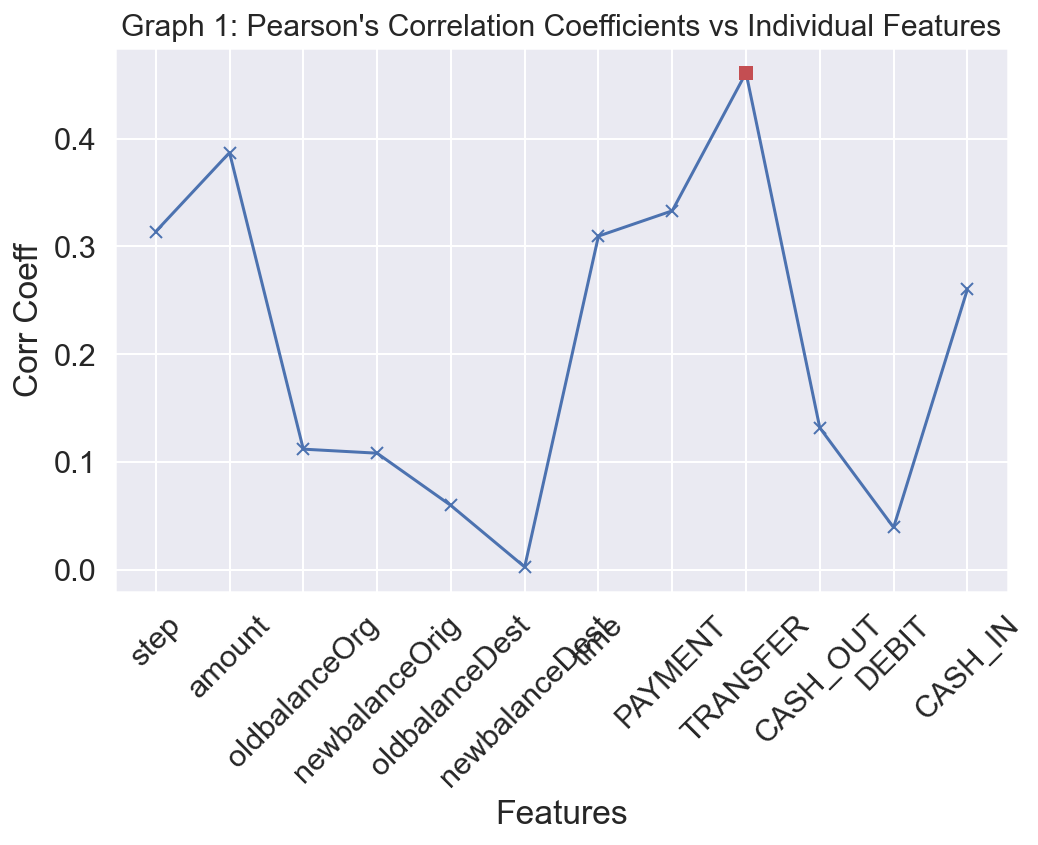

TRANSFER has the highest correlation coefficient: 0.4609636448841631


In [180]:
# Refine model - Score Individual Best Features
COEFFs = []
for p in X.columns:   
    COEFFs.append(abs(fraudUse['isFraud'].corr(fraudUse[p])))

COEFFs = np.array(COEFFs)
plt.figure(figsize=(8, 5))
plt.plot(X.columns, COEFFs, 'b-x')
plt.plot(X.columns[COEFFs.argmax()], COEFFs.max(), 'rs')
plt.title("Graph 1: Pearson's Correlation Coefficients vs Individual Features", fontsize=15)
plt.ylabel("Corr Coeff")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()

print(X.columns[COEFFs.argmax()], "has the highest correlation coefficient:",COEFFs.max())

Evaluate Logistic Regression using all features

In [183]:
# Train and test using all features
modelLR=LogisticRegression()
modelLR.fit(X_train, y_train)
all_yHat = modelLR.predict(X_test)
allSCORE_train = modelLR.score(X_train, y_train)
allSCORE_test = modelLR.score(X_test, y_test)
print("Accuracy train score using all features:", allSCORE_train)
print("Accuracy test score using all features:", allSCORE_test)

# Confusion Matrix for test data
print('\nConfusion Matrix on test data (All Features)')
print(metrics.confusion_matrix(y_test, all_yHat))

Accuracy train score using all features: 0.9323034984098137
Accuracy test score using all features: 0.9280575539568345

Confusion Matrix on test data (All Features)
[[7857  284]
 [ 496 2205]]


Evaluate Logistic Regression using subset of best-correlated features

In [184]:
# Train and test using a selected subset of features based on best correlation
featuresSubset = ['step', 'amount', 'time', 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

X_train_subset = X_train[featuresSubset]
X_test_subset = X_test[featuresSubset]

modelLR.fit(X_train_subset, y_train)
subset_yHat = modelLR.predict(X_test_subset)
subsetSCORE_train = modelLR.score(X_train_subset, y_train)
subsetSCORE_test = modelLR.score(X_test_subset, y_test)
print("Accuracy train score when using a subset of best correlated features:",  subsetSCORE_train)
print("Accuracy test score when using a subset of best correlated features:",  subsetSCORE_test)

# Confusion Matrix for test data
print('\nConfusion Matrix on test data (Subset of Features)')
print(metrics.confusion_matrix(y_test, subset_yHat))

Accuracy train score when using a subset of best correlated features: 0.8552476147205815
Accuracy test score when using a subset of best correlated features: 0.8527024534218779

Confusion Matrix on test data (Subset of Features)
[[7850  291]
 [1306 1395]]


# Model Evaluation

In [185]:
# Instantiate models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

modelLR = LogisticRegression()
modelKNN = KNeighborsClassifier(5)
modelLinearSVC = LinearSVC(C=10, max_iter=2000, random_state=0)
modelRbfSVC = SVC(kernel='rbf', C=10, random_state=0)

In [186]:
models = [
    {
        "name": "Logistic Regression",
        "model": modelLR
    },
    {
        "name": "k Nearest Neighbors",
        "model": modelKNN
    },
    {
        "name": "SVM (Linear Kernel)",
        "model": modelLinearSVC
    },
    {
        "name": "SVM (RBF Kernel)",
        "model": modelRbfSVC
    }
]

In [187]:
# For each model, generate predictions and save them as yHat, and evaluate
modelNames = []
SCOREs_train = []
SCOREs_test = []
for i,est in enumerate(models):
    estimator_name = est["name"]
    print("="*55)
    print(f"Evaluating Model: {estimator_name}")
    print("-"*55)
    modelNames.append(estimator_name)
    model = est["model"]
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    SCOREs_train.append(model.score(X_train, y_train))
    SCOREs_test.append(model.score(X_test, y_test))
    
    print ("\n   Training Accuracy:", SCOREs_train[i])
    print ("   Testing Accuracy:", SCOREs_test[i])

    #confusion matrix

    print ("\n   Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_hat))

    #classification report

    print ("\n   Classification Report:\n", metrics.classification_report(y_test, y_hat))

Evaluating Model: Logistic Regression
-------------------------------------------------------

   Training Accuracy: 0.9323034984098137
   Testing Accuracy: 0.9280575539568345

   Confusion Matrix:
 [[7857  284]
 [ 496 2205]]

   Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      8141
           1       0.89      0.82      0.85      2701

    accuracy                           0.93     10842
   macro avg       0.91      0.89      0.90     10842
weighted avg       0.93      0.93      0.93     10842

Evaluating Model: k Nearest Neighbors
-------------------------------------------------------

   Training Accuracy: 0.9750567923671059
   Testing Accuracy: 0.9633831396421324

   Confusion Matrix:
 [[7934  207]
 [ 190 2511]]

   Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      8141
           1       0.92      0.93      0.93      2701

 

C:\Users\sheds\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "



   Training Accuracy: 0.9685143116765107
   Testing Accuracy: 0.9650433499354363

   Confusion Matrix:
 [[7917  224]
 [ 155 2546]]

   Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      8141
           1       0.92      0.94      0.93      2701

    accuracy                           0.97     10842
   macro avg       0.95      0.96      0.95     10842
weighted avg       0.97      0.97      0.97     10842

Evaluating Model: SVM (RBF Kernel)
-------------------------------------------------------

   Training Accuracy: 0.930940481599273
   Testing Accuracy: 0.926950747094632

   Confusion Matrix:
 [[8052   89]
 [ 703 1998]]

   Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      8141
           1       0.96      0.74      0.83      2701

    accuracy                           0.93     10842
   macro avg       0.94      0.86      0.89   

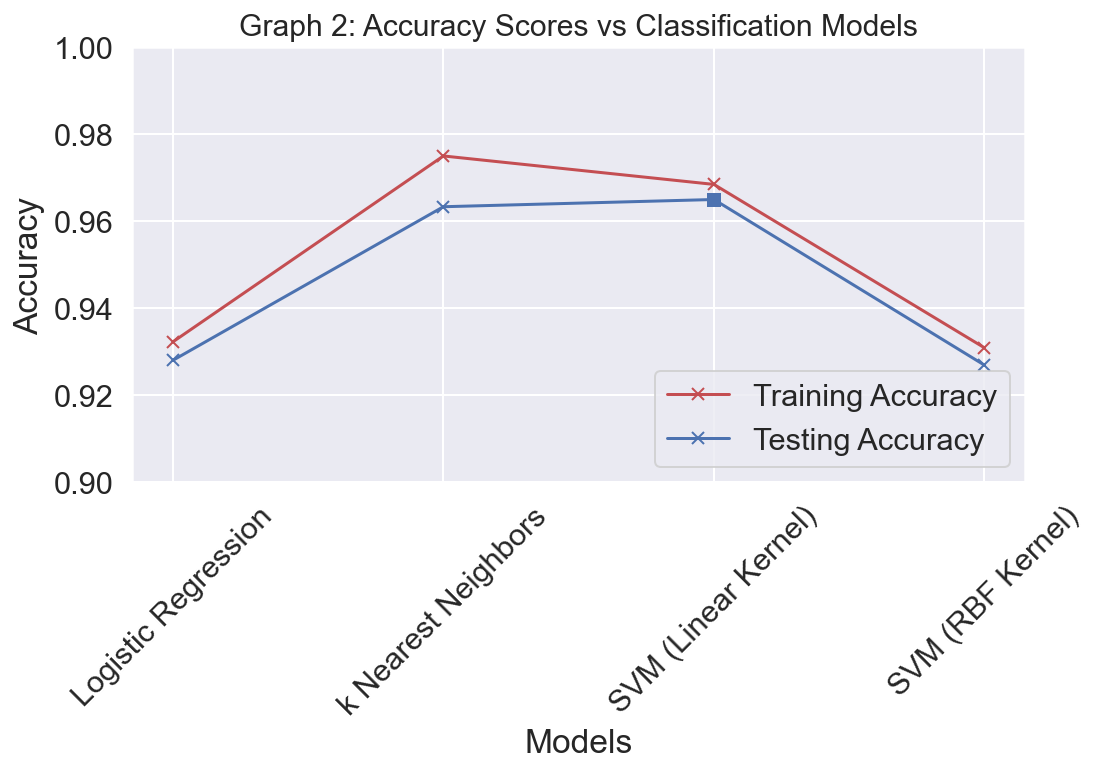

In [189]:
SCOREs_train = np.array(SCOREs_train)
SCOREs_test = np.array(SCOREs_test)
plt.figure(figsize=(8, 4))
l1=plt.plot(modelNames, SCOREs_train, 'r-x')
l2=plt.plot(modelNames, SCOREs_test, 'b-x')
plt.plot(SCOREs_test.argmax(), SCOREs_test.max(), 'bs')
plt.title("Graph 2: Accuracy Scores vs Classification Models", fontsize=15)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylim(0.9,1)
plt.legend((l1[-1], l2[-1]), ('Training Accuracy', 'Testing Accuracy'), loc='lower right')

plt.show()